# SliceFinder Demo

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from slice_finder import SliceFinder

from ipywidgets import interact, interactive
from IPython.display import display

from bokeh.layouts import widgetbox, row
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models.widgets import DataTable, TableColumn  
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

Loading BokehJS ...

## Toy Example: UCI Census Data Set
For the demo, we use UCI Census data set and the classification task is to predict who makes above 50k a year.

In [2]:
adult_data = pd.read_csv(
    "data/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

# drop nan values
adult_data = adult_data.dropna()

# Encode categorical features
encoders = {}
for column in adult_data.columns:
    if adult_data.dtypes[column] == np.object:
        le = LabelEncoder()
        adult_data[column] = le.fit_transform(adult_data[column])
        encoders[column] = le
        print(column, le.classes_, le.transform(le.classes_))

X, y = adult_data[adult_data.columns.difference(["Target"])], adult_data["Target"]

pickle.dump(encoders, open("encoders.pkl", "wb"), protocol=2)

# Train a model
#lr = LogisticRegression()
#lr.fit(X, y)
lr = RandomForestClassifier(max_depth=5, n_estimators=10)
lr.fit(X, y)

sf = SliceFinder(lr, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

Workclass ['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay'] [0 1 2 3 4 5 6]
Education ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Martial Status ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed'] [0 1 2 3 4 5 6]
Occupation ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Relationship ['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife'] [0 1 2 3 4 5]
Race ['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White'] [0 1 2 3 4]
Sex ['Female' 'M

## SliceFinder Recommendation Example

In [3]:

recommendations = sf.find_slice(k=100, epsilon=0.4, degree=2, max_workers=4)

for s in recommendations:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))

degree 1
crossing
effect size filtering
degree 2
crossing
effect size filtering
sorting

Slice description:
Martial Status:Married-civ-spouse 
---------------------
effect_size: 0.6217871501078527
---------------------
metric: 0.5594423657973929
size: 14065

Slice description:
Relationship:Husband 
---------------------
effect_size: 0.5640269138004512
---------------------
metric: 0.5560360665400624
size: 12463

Slice description:
Relationship:Wife 
---------------------
effect_size: 0.45135747056546444
---------------------
metric: 0.6119698909286201
size: 1406

Slice description:
Capital Gain:0 
Education:Prof-school 
---------------------
effect_size: 0.4102776373679693
---------------------
metric: 0.6054116201943812
size: 403

Slice description:
Capital Gain:0 
Education-Num:15 
---------------------
effect_size: 0.4102776373679693
---------------------
metric: 0.6054116201943812
size: 403

Slice description:
Education:Doctorate 
Capital Gain:0 
---------------------
effect_size: 

In [4]:
slices = list()
with open('slices.p','rb') as handle:
    slices = pickle.load(handle)

pickle.dump(slices, open('slices_ver2.pkl','wb'), protocol=2)

encoders = dict()
with open('encoder')

slices = list()
with open('slices_ver2.pkl','rb') as handle:
    slices = pickle.load(handle)
    
slices_ = sorted(slices, key=lambda s: s.size, reverse=True)    
k = 10    
for s in slices_[:k]:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))


Slice description:
Sex:Male 
---------------------
effect_size: 0.489027069358
---------------------
metric: 0.415072526958
size: 20380

Slice description:
Martial Status:Married-civ-spouse 
---------------------
effect_size: 0.923021720221
---------------------
metric: 0.54597411274
size: 14065

Slice description:
Relationship:Husband 
---------------------
effect_size: 0.837430353161
---------------------
metric: 0.543190034329
size: 12463

Slice description:
Capital Gain:0 
Occupation:Exec-managerial 
---------------------
effect_size: 0.468894755867
---------------------
metric: 0.525271237101
size: 3453

Slice description:
Capital Gain:0 
Hours per week:50 
---------------------
effect_size: 0.479851077333
---------------------
metric: 0.532079519063
size: 2333

Slice description:
Education:Masters 
Capital Loss:0 
---------------------
effect_size: 0.410478506987
---------------------
metric: 0.503320568135
size: 1482

Slice description:
Education-Num:14 
Capital Loss:0 
-------

## SliceFinder User Interface with Minimum Effect Size Slider

In [5]:
slices, uninteresting = list(), list()
with open('slices.p','rb') as handle:
    slices = pickle.load(handle)
with open('uninteresting.p','rb') as handle:
    uninteresting = pickle.load(handle)  

def get_top_k_slices(candidates, min_effect_size):
    description_ = list()
    size_ = list()
    effect_size_ = list()
    metric_ = list()
    for s in candidates:
        if s.effect_size < min_effect_size:
            continue
            
        description = ''
        for k, v in list(s.filters.items()):
            values = ''
            if k in encoders:
                le = encoders[k]
                for v_ in v:
                    values += '%s '%(le.inverse_transform(v_)[0])
            else:
                for v_ in sorted(v, key=lambda x: x[0]):
                    if len(v_) > 1:
                        values += '%s ~ %s'%(v_[0], v_[1])
                    else:
                        values += '%s '%(v_[0])
            description += '%s:%s '%(k, values)
        description_.append(description)
        size_.append(s.size)
        effect_size_.append(s.effect_size)
        metric_.append(s.metric)
    return description_, size_, effect_size_, metric_

# load interesting slices
description_, size_, effect_size_, metric_ = get_top_k_slices(slices, 0)
    
# load uninteresting slices (candidates)
description_c, size_c, effect_size_c, metric_c = get_top_k_slices(uninteresting, 0)
    
data = dict(
        description=description_,
        size=size_,
        effect_size=effect_size_,
        metric=metric_,
    )
source = ColumnDataSource(data)

# scatter plot
hover = HoverTool(tooltips=[
    ("desc", "@description"),
    ("size", "@size"),
    ("effect_size", "@effect_size"),
    ("metric", "@metric"),
])
TOOLS = [hover]
p = figure(tools=TOOLS, plot_width=400, plot_height=400, 
           y_axis_label='Effect Size', x_axis_label='Size', title=None)
r = p.circle('size', 'effect_size', source=source)
#show(p, notebook_handle=True)

# data table
columns = [
        TableColumn(field="description", title="Description"),
        TableColumn(field="size", title="Size"),
        TableColumn(field="effect_size", title="Effect Size"),
        TableColumn(field="metric", title="Log Loss"),
    ]
t = DataTable(source=r.data_source, columns=columns, width=600, height=400)

show(row(p, t), notebook_handle=True)

def update(k=30, min_eff_size=0.3):
    desc_, size_, effect_size_, metric_ = get_top_k_slices(slices+uninteresting, min_eff_size)
    idx = sorted(range(len(size_)), key=lambda x: size_[x], reverse=True)
    r.data_source.data['description'] = np.array(desc_)[idx[:k]]
    r.data_source.data['size'] = np.array(size_)[idx[:k]]
    r.data_source.data['effect_size'] = np.array(effect_size_)[idx[:k]]
    r.data_source.data['metric'] = np.array(metric_)[idx[:k]]
    push_notebook()
    
w = interactive(update, k=(1,100), min_eff_size=(0, 1, 0.05))
display(w)

interactive(children=(IntSlider(value=30, description='k', min=1), FloatSlider(value=0.3, description='min_effâ€¦

## Preliminary Results
Evaluate different baseline techniques as well as SliceFinder to see if they yield large problematic slices.

In [9]:
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from risk_control import effect_size
from decision_tree import DecisionTree

min_eff_size = 0.4
dataset = 'UCI'

sf = SliceFinder(lr, (X, y))
sf_recs = [s for s in slices+uninteresting if s.effect_size >= min_eff_size]
sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)

In [10]:
scaler = StandardScaler()
numeric_cols = ["Capital Gain", "Age", "fnlwgt", "Education-Num", "Capital Loss"]
X_ = copy.deepcopy(X)
X_[numeric_cols] = scaler.fit_transform(X_[numeric_cols])
reduced_data_train = PCA(n_components=2).fit_transform(X_)
reduced_data_test = PCA(n_components=2).fit_transform(X_)

In [12]:
decisions = []
for x_, y_ in zip(X.to_numpy(), y.to_numpy()):
    y_p = lr.predict([x_])
    if y_p == y_:
        decisions.append(0)
    else:
        decisions.append(1)
dt = DecisionTree((X, y), lr)
dt = dt.fit(max_depth=6, min_size=100)

test root, size: 30162


In [13]:
sf_k, sf_avg_sizes, sf_avg_eff_sizes = list(), list(), list()
cluster_k, cluster_avg_sizes, cluster_avg_eff_sizes = list(), list(), list()
tree_k, tree_avg_sizes, tree_avg_eff_sizes = list(), list(), list()

for k in range(1, 11):
    sf_recs_ = sf_recs[:k]
    if len(sf_recs_) == k:
        sf_k.append(k)
        sf_avg_sizes.append(np.mean([s.size for s in sf_recs_]))
        sf_avg_eff_sizes.append(np.mean([s.effect_size for s in sf_recs_]))
    
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(reduced_data_train) # train with mis-classified data
    y_predicted = kmeans.predict(reduced_data_test) # classify all data
    sizes, eff_sizes = list(), list()
    for cluster_id in np.unique(kmeans.labels_):
        X_cluster = X[np.array(y_predicted) == cluster_id]
        y_cluster = y[np.array(y_predicted) == cluster_id]
        sizes.append(len(X_cluster))
        eff_sizes.append(effect_size(sf.evaluate_model((X_cluster, y_cluster)), reference))
    cluster_k.append(k)
    cluster_avg_eff_sizes.append(np.mean(eff_sizes))
    cluster_avg_sizes.append(np.mean(sizes))
    
    dt_recs = dt.recommend_slices(k=k, min_effect_size=min_eff_size)
    if len(dt_recs) == k:
        tree_k.append(k)
        tree_avg_sizes.append(np.mean([s.size for s in dt_recs]))
        tree_avg_eff_sizes.append(np.mean([s.eff_size for s in dt_recs]))

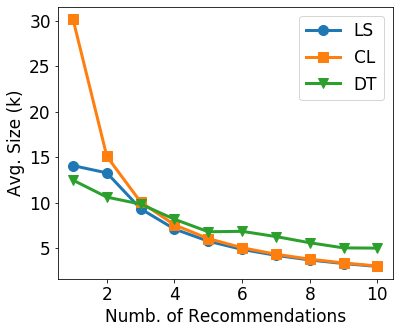

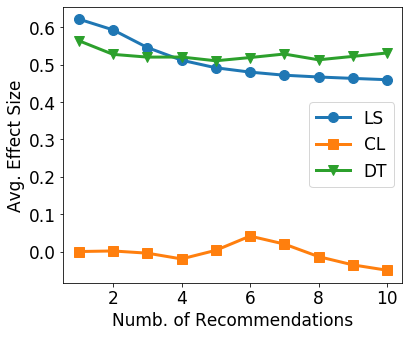

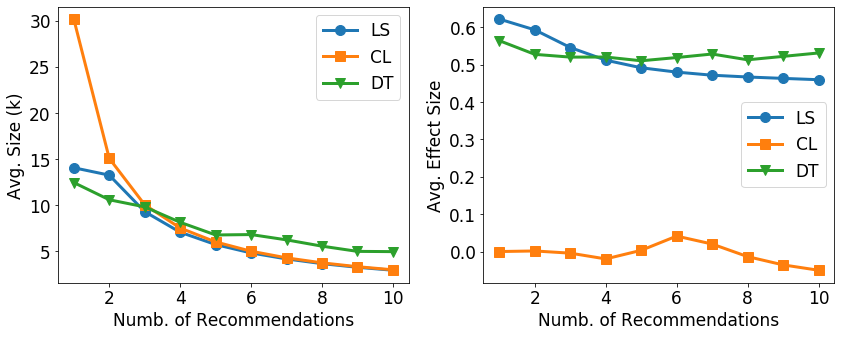

In [14]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

plt.figure(1, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/1000, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, np.array(cluster_avg_sizes)/1000, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/1000, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Size (k)', fontsize=17)
plt.savefig('%s_size_%s.pdf'%(dataset,min_eff_size))

plt.figure(2, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
plt.tight_layout()
plt.savefig('%s_effsize_%s.pdf'%(dataset,min_eff_size))
plt.show()

plt.figure(3, figsize=(12,5))
#plt.suptitle('Quality of recommended slices from UCI Census Data Set', y=1.02)
plt.subplot(1,2,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/1000, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, np.array(cluster_avg_sizes)/1000, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/1000, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Size (k)', fontsize=17)
plt.subplot(1,2,2)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.tight_layout()
plt.show()


### Adjusting T

In [15]:

k = 10

sf_k, sf_avg_sizes, sf_avg_eff_sizes = list(), list(), list()
cluster_k, cluster_avg_sizes, cluster_avg_eff_sizes = list(), list(), list()
tree_k, tree_avg_sizes, tree_avg_eff_sizes = list(), list(), list()

for min_eff_size in np.array(range(1,9))/10.:
    sf = SliceFinder(lr, (X, y))
    sf_recs = [s for s in slices+uninteresting if s.effect_size >= min_eff_size]
    sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)
    
    sf_recs_ = sf_recs[:k]
    if len(sf_recs_) == k:
        sf_k.append(min_eff_size)
        sf_avg_sizes.append(np.mean([s.size for s in sf_recs_]))
        sf_avg_eff_sizes.append(np.mean([s.effect_size for s in sf_recs_]))
    
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(reduced_data_train) # train with mis-classified data
    y_predicted = kmeans.predict(reduced_data_test) # classify all data
    sizes, eff_sizes = list(), list()
    for cluster_id in np.unique(kmeans.labels_):
        X_cluster = X[np.array(y_predicted) == cluster_id]
        y_cluster = y[np.array(y_predicted) == cluster_id]
        sizes.append(len(X_cluster))
        eff_sizes.append(effect_size(sf.evaluate_model((X_cluster, y_cluster)), reference))
    cluster_k.append(min_eff_size)
    cluster_avg_eff_sizes.append(np.mean(eff_sizes))
    cluster_avg_sizes.append(np.mean(sizes))
    
    dt_recs = dt.recommend_slices(k=k, min_effect_size=min_eff_size)
    if len(dt_recs) == k:
        tree_k.append(min_eff_size)
        tree_avg_sizes.append(np.mean([s.size for s in dt_recs]))
        tree_avg_eff_sizes.append(np.mean([s.eff_size for s in dt_recs]))



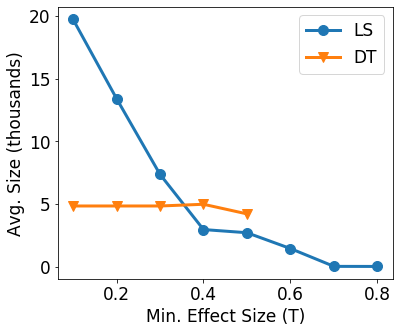

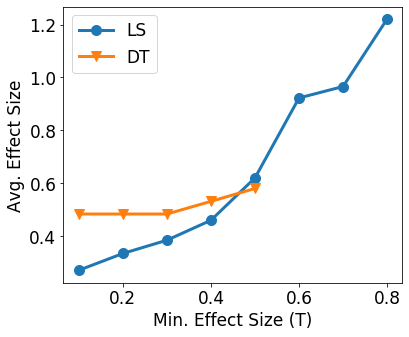

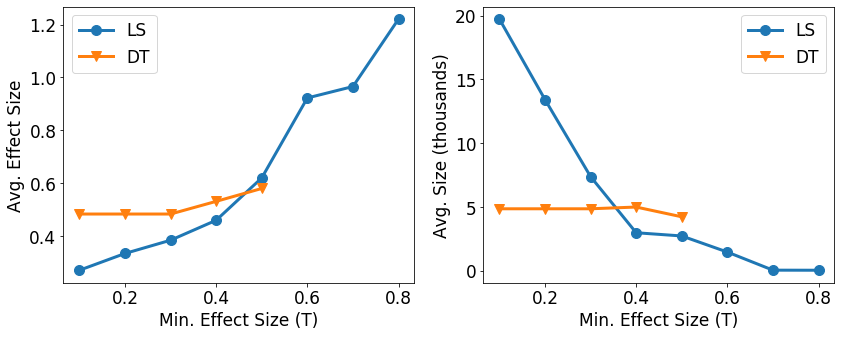

In [16]:
plt.figure(1, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/1000, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, np.array(cluster_avg_sizes)/1000, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/1000, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Size (thousands)', fontsize=17)
plt.savefig('%s_size_%s_2.pdf'%(dataset,min_eff_size))        
        
plt.figure(2, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
plt.tight_layout()
plt.savefig('%s_effsize_%s_2.pdf'%(dataset,min_eff_size))
plt.show()

plt.figure(3, figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(sf_k, np.array(sf_avg_sizes)/1000, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, np.array(cluster_avg_sizes)/1000, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/1000, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Size (thousands)', fontsize=17)
plt.subplot(1,2,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.savefig('%s_slider.pdf'%(dataset))
plt.tight_layout()
plt.show()



## Fraudulent Data

In [36]:
import copy
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from risk_control import effect_size
from decision_tree import DecisionTree

#main_df=pd.read_csv("creditcard.csv")
main_df=pd.read_csv("data/creditcard.csv")
main_df.head()
feature_size = len(main_df.columns)
class_index = feature_size -1 

fraud_raw = main_df[main_df['Class'] == 1]
normal_raw = main_df[main_df['Class'] == 0]

# Undersample the normal transactions
percentage = len(fraud_raw)/float(len(normal_raw))
normal = normal_raw.sample(frac=percentage)
fraud = fraud_raw
cc_data = fraud.append(normal)

In [37]:
#msk = np.random.rand(len(cc_data)) < 0.8
X, y = cc_data[cc_data.columns.difference(["Class"])], cc_data["Class"]
#X_train, y_train = X[msk], y[msk]
#X, y = X[~msk], y[~msk]

reg_model = RandomForestClassifier(criterion='entropy',n_estimators=100)
lr = reg_model.fit(X,y)

In [38]:
sf = SliceFinder(lr, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

In [39]:
recommendations = sf.find_slice(k=30, epsilon=0.4, degree=5)
encoders = {}
for s in recommendations:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))

degree 1
crossing
effect size filtering
degree 2
crossing
effect size filtering
sorting

Slice description:
V10:-2.126451537523515 ~ -0.7981411156919844
V14:-3.721686057106141 ~ -0.997981895768133
---------------------
effect_size: 0.4667040016986077
---------------------
metric: 0.17876190902821468
size: 28

Slice description:
V2:-13.1420575024667 ~ -1.1253785485201442
V7:0.9879349793291172 ~ 5.8025373530258895
---------------------
effect_size: 0.4286697944539189
---------------------
metric: 0.16670613102444207
size: 24

Slice description:
V14:-3.721686057106141 ~ -0.997981895768133
V17:0.400381749830819 ~ 1.0067915715722418
---------------------
effect_size: 0.4001224879136503
---------------------
metric: 0.16791439940081007
size: 17

Slice description:
V10:-2.126451537523515 ~ -0.7981411156919844
V4:0.15257655128798442 ~ 0.7224830014897283
---------------------
effect_size: 0.4112199291238304
---------------------
metric: 0.16841448104352397
size: 16

Slice description:
V12:-0.83

In [40]:
slices, uninteresting = list(), list()
with open('slices.p','rb') as handle:
    slices = pickle.load(handle)
with open('uninteresting.p','rb') as handle:
    uninteresting = pickle.load(handle)  
    
min_eff_size = 0.4
dataset = 'Fraud'

sf_recs = [s for s in slices+uninteresting if s.effect_size >= min_eff_size]
sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)

In [42]:
filtered_slices, rejected, bf_slices, bf_rejected, ai_slices, ai_rejected = sf.filter_by_significance(slices, reference, 0.05)
print (len(filtered_slices), len(rejected))

0 605


In [43]:
scaler = StandardScaler()
numeric_cols = list(main_df.columns[1:28])
X_ = copy.deepcopy(X)
X_[numeric_cols] = scaler.fit_transform(X_[numeric_cols])
reduced_data_train = PCA(n_components=2).fit_transform(X_)
reduced_data_test = PCA(n_components=2).fit_transform(X_)

In [45]:
decisions = []
for x_, y_ in zip(X.to_numpy(), y.to_numpy()):
    y_p = lr.predict([x_])
    if y_p == y_:
        decisions.append(0)
    else:
        decisions.append(1)
dt = DecisionTree((X, y), lr)
dt = dt.fit(max_depth=20, min_size=10)

test root, size: 984


In [46]:
sf_k, sf_avg_sizes, sf_avg_eff_sizes = list(), list(), list()
cluster_k, cluster_avg_sizes, cluster_avg_eff_sizes = list(), list(), list()
tree_k, tree_avg_sizes, tree_avg_eff_sizes = list(), list(), list()

for k in range(1, 11):
    sf_recs_ = sf_recs[:k]
    if len(sf_recs_) == k:
        sf_k.append(k)
        sf_avg_sizes.append(np.mean([s.size for s in sf_recs_]))
        sf_avg_eff_sizes.append(np.mean([s.effect_size for s in sf_recs_]))
    
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(reduced_data_train) # train with mis-classified data
    y_predicted = kmeans.predict(reduced_data_test) # classify all data
    sizes, eff_sizes = list(), list()
    for cluster_id in np.unique(kmeans.labels_):
        X_cluster = X[np.array(y_predicted) == cluster_id]
        y_cluster = y[np.array(y_predicted) == cluster_id]
        sizes.append(len(X_cluster))
        eff_sizes.append(effect_size(sf.evaluate_model((X_cluster, y_cluster)), reference))
    cluster_k.append(k)
    cluster_avg_eff_sizes.append(np.mean(eff_sizes))
    cluster_avg_sizes.append(np.mean(sizes))
    
    dt_recs = dt.recommend_slices(k=k, min_effect_size=min_eff_size)
    if len(dt_recs) == k:
        tree_k.append(k)
        tree_avg_sizes.append(np.mean([s.size for s in dt_recs]))
        tree_avg_eff_sizes.append(np.mean([s.eff_size for s in dt_recs]))

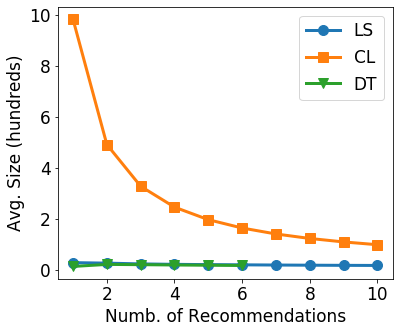

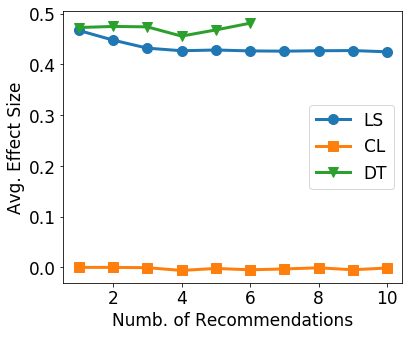

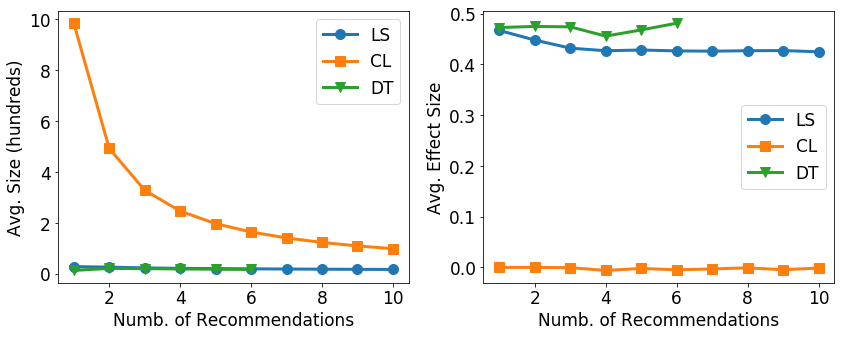

In [47]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

plt.figure(1, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/100, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, np.array(cluster_avg_sizes)/100, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/100, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Size (hundreds)', fontsize=17)
plt.savefig('%s_size%s.pdf'%(dataset,min_eff_size))

plt.figure(2, figsize=(6,5))
ax = plt.subplot(1,1,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
plt.tight_layout()
plt.savefig('%s_effsize_%s.pdf'%(dataset,min_eff_size))
plt.show()

plt.figure(3, figsize=(12,5))
#plt.suptitle('Quality of recommended slices from UCI Census Data Set', y=1.02)
plt.subplot(1,2,1)
plt.plot(sf_k, np.array(sf_avg_sizes)/100, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, np.array(cluster_avg_sizes)/100, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/100, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Size (hundreds)', fontsize=17)
plt.subplot(1,2,2)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Numb. of Recommendations', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.tight_layout()
plt.show()

In [48]:

k = 10

sf_k, sf_avg_sizes, sf_avg_eff_sizes = list(), list(), list()
cluster_k, cluster_avg_sizes, cluster_avg_eff_sizes = list(), list(), list()
tree_k, tree_avg_sizes, tree_avg_eff_sizes = list(), list(), list()

for min_eff_size in np.array(range(1,9))/10.:
    sf = SliceFinder(lr, (X, y))
    sf_recs = [s for s in slices+uninteresting if s.effect_size >= min_eff_size]
    sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)
    
    sf_recs_ = sf_recs[:k]
    if len(sf_recs_) == k:
        sf_k.append(min_eff_size)
        sf_avg_sizes.append(np.mean([s.size for s in sf_recs_]))
        sf_avg_eff_sizes.append(np.mean([s.effect_size for s in sf_recs_]))
    
   
    dt_recs = dt.recommend_slices(k=k, min_effect_size=min_eff_size)
    if len(dt_recs) == k:
        tree_k.append(min_eff_size)
        tree_avg_sizes.append(np.mean([s.size for s in dt_recs]))
        tree_avg_eff_sizes.append(np.mean([s.eff_size for s in dt_recs]))





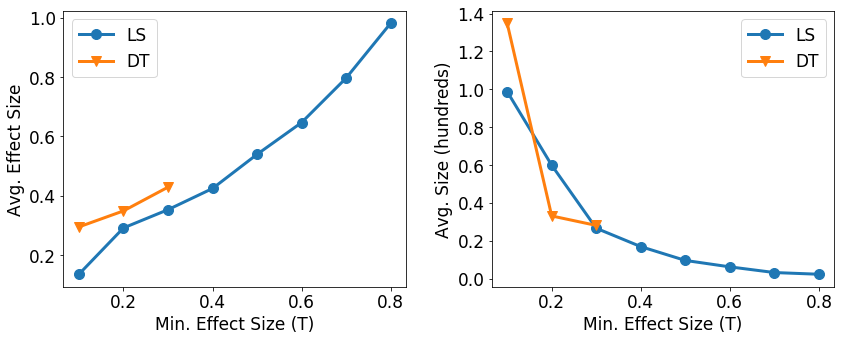

In [49]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 17})

plt.figure(3, figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(sf_k, np.array(sf_avg_sizes)/100, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, np.array(cluster_avg_sizes)/100, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, np.array(tree_avg_sizes)/100, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Size (hundreds)', fontsize=17)
plt.subplot(1,2,1)
plt.plot(sf_k, sf_avg_eff_sizes, 'o-', label='LS', linewidth=3.0, markersize=10)
#plt.plot(cluster_k, cluster_avg_eff_sizes, 's-', label='CL', linewidth=3.0, markersize=10)
plt.plot(tree_k, tree_avg_eff_sizes, 'v-', label='DT', linewidth=3.0, markersize=10)
plt.legend()
plt.xlabel('Min. Effect Size (T)', fontsize=17)
plt.ylabel('Avg. Effect Size', fontsize=17)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.savefig('%s_slider.pdf'%(dataset))
plt.tight_layout()
plt.show()

In [50]:
### Top-3 slices for LS and DT

In [51]:
#sf_recs = sorted(sf_recs, key=lambda x: x.size, reverse=True)
for s in sf_recs[:3]:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))
    
for s in dt_recs[:3]:
    print ('\n=====================\nSlice description:')
    print (s.__ancestry__())
    print (s.__str__())
    print ('---------------------\neffect_size: %s'%(s.eff_size))
    print ('size: %s'%(s.size))


Slice description:
V12:-0.32510820709238414 ~ 0.026584027919710002
V21:0.895853399617506 ~ 1.7318437624290226
---------------------
effect_size: 0.8497870146937785
---------------------
metric: 0.29209395595163984
size: 3

Slice description:
V17:0.09643009170612918 ~ 0.400381749830819
V4:2.3708153281213864 ~ 3.606615523226325
---------------------
effect_size: 0.938921870715013
---------------------
metric: 0.2529817203834592
size: 3

Slice description:
V2:0.5087790861530184 ~ 0.957269273592801
V3:-4.160224544806608 ~ -2.3212349656394773
---------------------
effect_size: 0.8579409178083619
---------------------
metric: 0.24916592510334223
size: 3


# Simulation Study
Emphasize that we are not just accuracy-hungting (i.e., give me slices with lowest performance?? The challenge is automatically defining slices, because there are just so many ways to slice the data); to this end, show how the performance distributions change over different numbers of clusters--connect this to the original motiviation, where the overall perofrmance differs from smaller slice performances.

Comment: model accuracy distributions? What happens when we add two additional dimensions, like size and interpretability? We need an interactive tool to assist users to quickly browse through problematic data slices for model validation.

## Feature variance

In [18]:
import seaborn as sns

In [19]:
y_hat = lr.predict(X)
X_mis = X[y != y_hat]

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(X_mis.values), 
    columns=X.columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

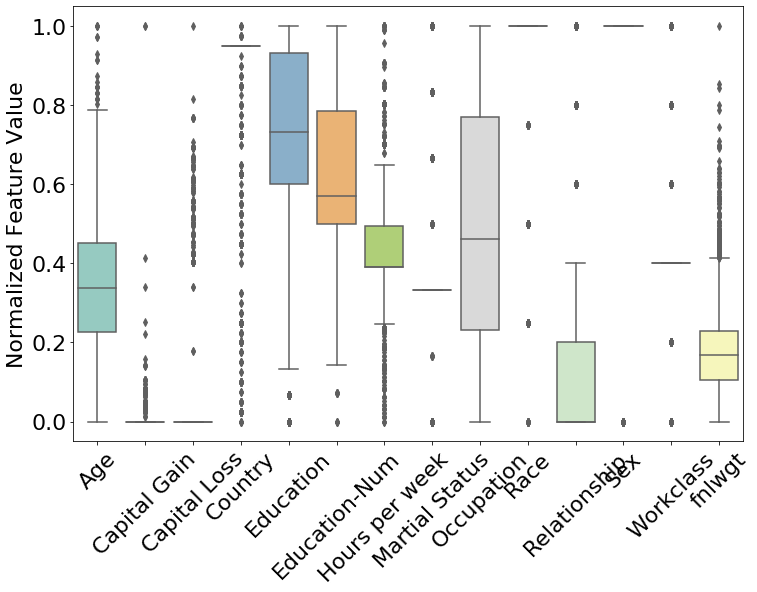

In [21]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))
ax = sns.boxplot(data=X_scaled, palette="Set3")
plt.ylabel('Normalized Feature Value')
plt.xticks(rotation=45)

## Accuracy-hunting approach
If we simply look for data slices with the lowest performance metrics, then we might end up with 1) slices that are too small or 2) too complicated to summarize and manually interpret. This is aside from the fact that we want to avoid presenting a numerous number of data slices to the user; to this end, we propose both a metric to identify a problematic slice for model validation and efficient top-down data slicing strategies that bring user's attention to a handful of the most problematic slices.

In [22]:
adult_data2 = pd.read_csv(
    "data/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

# drop nan values
adult_data2 = adult_data2.dropna()
adult_mis = adult_data2[y!=y_hat]
#print(adult_mis.dtypes)
df_edu_sex = pd.crosstab(adult_mis['Education'],adult_mis['Sex'])

#mosaic(df_edu_sex.stack(), title='Education-Sex')
#plt.show()

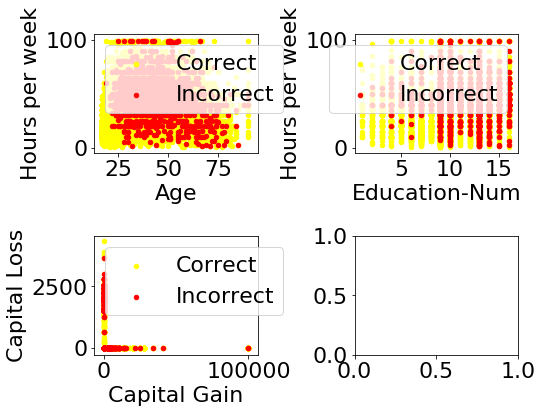

In [23]:
fig, axes = plt.subplots(2,2,figsize=(8,6))
adult_data2.plot.scatter('Age','Hours per week', color='yellow', label='Correct', ax=axes[0][0])
adult_mis.plot.scatter('Age','Hours per week', color='red', label='Incorrect',ax=axes[0][0])

adult_data2.plot.scatter('Education-Num','Hours per week', color='yellow', label='Correct', ax=axes[0][1])
adult_mis.plot.scatter('Education-Num','Hours per week', color='red', label='Incorrect',ax=axes[0][1])

adult_data2.plot.scatter('Capital Gain','Capital Loss', color='yellow', label='Correct', ax=axes[1][0])
adult_mis.plot.scatter('Capital Gain','Capital Loss', color='red', label='Incorrect',ax=axes[1][0])
plt.tight_layout()

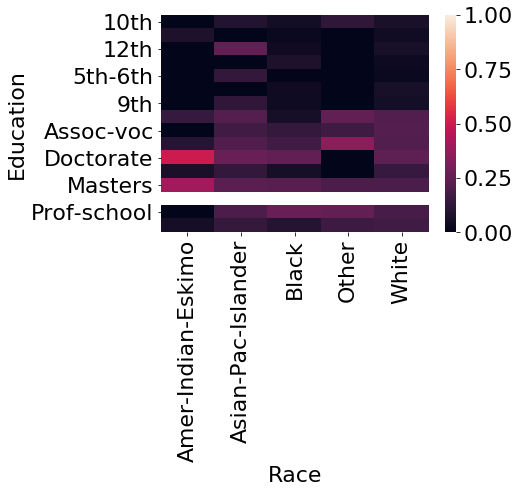

In [24]:
df_edu_race = pd.crosstab(adult_mis['Education'], adult_mis['Race']).divide(
    pd.crosstab(adult_data2['Education'],adult_data2['Race']))
sns.heatmap(df_edu_race, vmin=0, vmax=1)

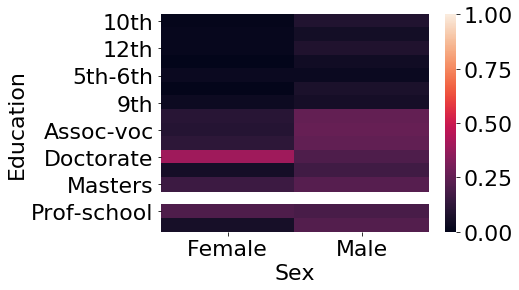

In [25]:
df_edu_sex = pd.crosstab(adult_mis['Education'], adult_mis['Sex']).divide(
    pd.crosstab(adult_data2['Education'],adult_data2['Sex']))
sns.heatmap(df_edu_sex, vmin=0, vmax=1)
plt.savefig('heat_edu_sex.png', bbox_inches='tight')

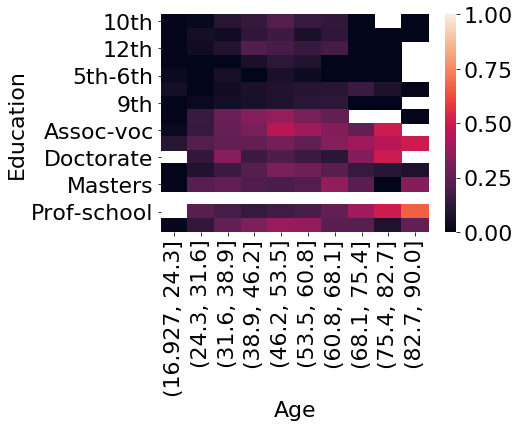

In [26]:
y_male = y[X['Sex']==1]
y_hat_male = lr.predict(X[X['Sex'] == 1])

adult_male = adult_data2[adult_data2['Sex'] == 'Male']
adult_male['Age'] = pd.cut(adult_male.Age, 10)
adult_male_edu_age = pd.crosstab(adult_male['Education'],adult_male['Age'])

adult_male_mis = adult_male[y_male != y_hat_male]
adult_male_mis_edu_age = pd.crosstab(adult_male_mis['Education'],adult_male_mis['Age'])

df_male_edu_age = adult_male_mis_edu_age.divide(adult_male_edu_age)
sns.heatmap(df_male_edu_age, vmin=0, vmax=1)
plt.savefig('heat_male_edu_age.png', bbox_inches='tight')

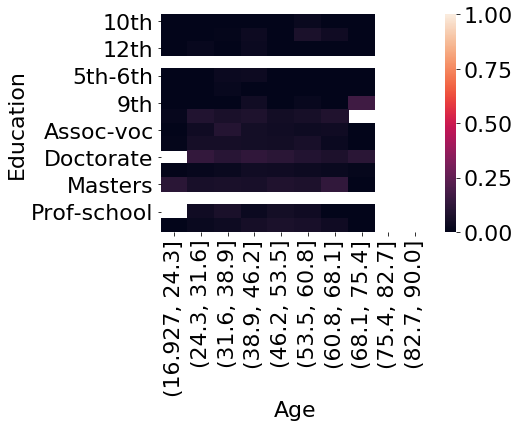

In [27]:
y_female = y[X['Sex']==0]
y_hat_female = lr.predict(X[X['Sex'] == 0])

adult_female = adult_data2[adult_data2['Sex'] == 'Female']
adult_female['Age'] = pd.cut(adult_female.Age, 10)
adult_female_edu_age = pd.crosstab(adult_male['Education'],adult_male['Age'])

adult_female_mis = adult_female[y_female != y_hat_female]
adult_female_mis_edu_age = pd.crosstab(adult_female_mis['Education'],adult_female_mis['Age'])

df_female_edu_age = adult_female_mis_edu_age.divide(adult_female_edu_age)
sns.heatmap(df_female_edu_age, vmin=0, vmax=1)
plt.savefig('heat_female_edu_age.png', bbox_inches='tight')

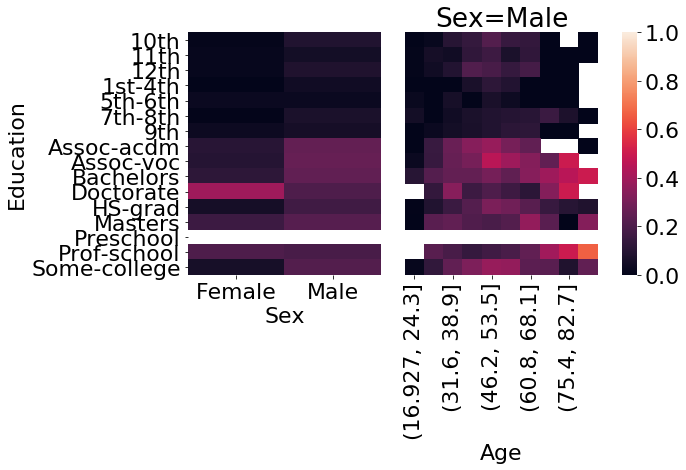

In [28]:
fig, axes = plt.subplots(1,3,figsize=(10,7),gridspec_kw={'width_ratios':[1,1,0.08]})
g1 = sns.heatmap(df_edu_sex, vmin=0, vmax=1, cbar=False, ax=axes[0])
g2 = sns.heatmap(df_male_edu_age, vmin=0, vmax=1, ax=axes[1], cbar_ax=axes[2])
g2.set_ylabel('')
g2.set_yticks([])
g2.set_title('Sex=Male')
#g3 = sns.heatmap(df_female_edu_age, vmin=0, vmax=1, ax=axes[2], cbar_ax=axes[3])
#g3.set_ylabel('')
#g3.set_yticks([])
#plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('heat_male_edu_age2.png', bbox_inches='tight')

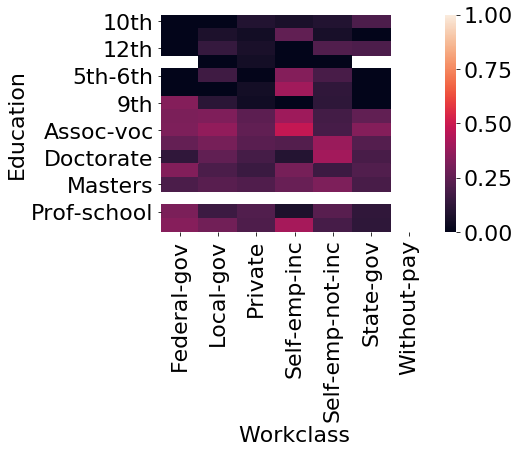

In [29]:
y_male = y[X['Sex']==1]
y_hat_male = lr.predict(X[X['Sex'] == 1])

adult_male = adult_data2[adult_data2['Sex'] == 'Male']
adult_male_edu_work = pd.crosstab(adult_male['Education'],adult_male['Workclass'])

adult_male_mis = adult_male[y_male != y_hat_male]
adult_male_mis_edu_work = pd.crosstab(adult_male_mis['Education'],adult_male_mis['Workclass'])

df_male_edu_work = adult_male_mis_edu_work.divide(adult_male_edu_work)
sns.heatmap(df_male_edu_work, vmin=0, vmax=1)
plt.savefig('heat_male_edu_work.png', bbox_inches='tight')

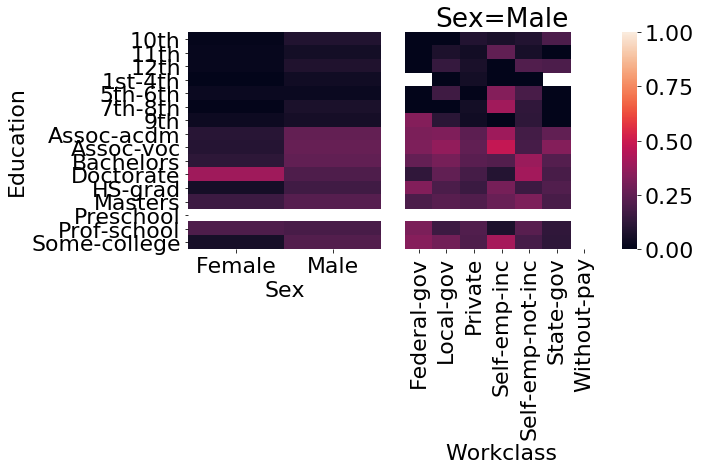

In [30]:
fig, axes = plt.subplots(1,3,figsize=(10,7),gridspec_kw={'width_ratios':[1,1,0.08]})
g1 = sns.heatmap(df_edu_sex, vmin=0, vmax=1, cbar=False, ax=axes[0])
g2 = sns.heatmap(df_male_edu_work, vmin=0, vmax=1, ax=axes[1], cbar_ax=axes[2])
g2.set_ylabel('')
g2.set_yticks([])
g2.set_title('Sex=Male')
#g3 = sns.heatmap(df_female_edu_age, vmin=0, vmax=1, ax=axes[2], cbar_ax=axes[3])
#g3.set_ylabel('')
#g3.set_yticks([])
#plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig('heat_male_edu_work2.png', bbox_inches='tight')

## Recall of Injected Ground Truth
Compare the effectiveness of different search strategies based on recall and the injected ground truth.

### Ground Truth Injection

In [31]:
adult_data = pd.read_csv(
    "data/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

# drop nan values
adult_data = adult_data.dropna()

# Encode categorical features
encoders = {}
for column in adult_data.columns:
    if adult_data.dtypes[column] == np.object:
        le = LabelEncoder()
        adult_data[column] = le.fit_transform(adult_data[column])
        encoders[column] = le

# Original dataset (X, y)
X, y = adult_data[adult_data.columns.difference(["Target"])], adult_data["Target"]

In [32]:
unmarried_white = X[(X['Relationship']==4) & (X['Race']==4)]
unmarried_white_female = unmarried_white[unmarried_white['Sex']==0]
print('Original dataset size: %s'%len(X))
print('Unmarried white demographic size: %s'%len(unmarried_white))
print('Unmarried white female demographic size: %s'%len(unmarried_white_female))

# Corrupted labels
import copy
y_c = copy.copy(y)
y_c.loc[unmarried_white_female.index] = (y_c.loc[unmarried_white_female.index] + 1)%2

Original dataset size: 30162
Unmarried white demographic size: 2341
Unmarried white female demographic size: 1732


In [33]:
# Train a model
lr_c = RandomForestClassifier(max_depth=5, n_estimators=10)
lr_c.fit(X, y_c)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
# Instantiate Slice Finder
sf = SliceFinder(lr_c, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

## Multiple-Comparison Problem

In [52]:
dataset = 'UCI'
encoders = {}

main_df = pd.read_csv("data/creditcard.csv")
main_df = main_df.dropna()
main_df.head()
feature_size = len(main_df.columns)
class_index = feature_size -1 

fraud_raw = main_df[main_df['Class'] == 1]
normal_raw = main_df[main_df['Class'] == 0]

# Undersample the normal transactions
percentage = len(fraud_raw)/float(len(normal_raw))
normal = normal_raw.sample(frac=percentage)
fraud = fraud_raw
cc_data = fraud.append(normal)

X, y = cc_data[cc_data.columns.difference(["Class"])], cc_data["Class"]

reg_model = RandomForestClassifier(criterion='entropy',n_estimators=100)
lr = reg_model.fit(X,y)

In [53]:
sf = SliceFinder(lr, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

In [54]:
adult_data = pd.read_csv(
    "data/adult.data",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

# drop nan values
adult_data = adult_data.dropna()

# Encode categorical features
encoders = {}
for column in adult_data.columns:
    if adult_data.dtypes[column] == np.object:
        le = LabelEncoder()
        adult_data[column] = le.fit_transform(adult_data[column])
        encoders[column] = le
        print(column, le.classes_, le.transform(le.classes_))

X, y = adult_data[adult_data.columns.difference(["Target"])], adult_data["Target"]

# Train a model
#lr = LogisticRegression()
#lr.fit(X, y)
lr = RandomForestClassifier(max_depth=5, n_estimators=10)
lr.fit(X, y)

sf = SliceFinder(lr, (X, y))
metrics_all = sf.evaluate_model((X,y))
reference = (np.mean(metrics_all), np.std(metrics_all), len(metrics_all))

Workclass ['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay'] [0 1 2 3 4 5 6]
Education ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Martial Status ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed'] [0 1 2 3 4 5 6]
Occupation ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Relationship ['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife'] [0 1 2 3 4 5]
Race ['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White'] [0 1 2 3 4]
Sex ['Female' 'M

In [55]:
recommendations = sf.find_slice(k=100, epsilon=0.4, degree=3, risk_control=False)
slices, uninteresting = list(), list()

degree 1
crossing
effect size filtering
degree 2
crossing
effect size filtering
sorting


In [56]:
# slice finder results before risk control
with open('slices.p','rb') as handle:
    slices = pickle.load(handle)
with open('uninteresting.p', 'rb') as handle:
    uninteresting = pickle.load(handle) 

print(len(slices))    
    
slices, rejected, bf_slices, bf_rejected, ai_slices, ai_rejected = sf.filter_by_significance(
    slices, reference, 0.1, max_workers=10)
print('\n============t-Testing:')
'''
for s in rejected:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))
'''
with open('accepted_%s.p'%dataset,'wb') as handle:
    pickle.dump(slices, handle)
with open('rejected_%s.p'%dataset, 'wb') as handle:
    pickle.dump(rejected, handle)
    
print('\n============Bon Ferroni:')
'''
for s in bf_rejected:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))
'''
with open('bf_accepted_%s.p'%dataset,'wb') as handle:
    pickle.dump(bf_slices, handle)
with open('bf_rejected_%s.p'%dataset, 'wb') as handle:
    pickle.dump(bf_rejected, handle)   
    
print('\n============Alpha-Investing:')
'''
for s in ai_rejected:
    print ('\n=====================\nSlice description:')
    for k, v in list(s.filters.items()):
        values = ''
        if k in encoders:
            le = encoders[k]
            for v_ in v:
                values += '%s '%(le.inverse_transform(v_)[0])
        else:
            for v_ in sorted(v, key=lambda x: x[0]):
                if len(v_) > 1:
                    values += '%s ~ %s'%(v_[0], v_[1])
                else:
                    values += '%s '%(v_[0])
        print ('%s:%s'%(k, values))
    print ('---------------------\neffect_size: %s'%(s.effect_size))
    print ('---------------------\nmetric: %s'%(s.metric))
    print ('size: %s'%(s.size))
'''
with open('ai_accepted_%s.p'%dataset,'wb') as handle:
    pickle.dump(ai_slices, handle)
with open('ai_rejected_%s.p'%dataset, 'wb') as handle:
    pickle.dump(ai_rejected, handle) 


2146

============t-Testing:

============Bon Ferroni:

============Alpha-Investing:


In [57]:
#print (len(slices), len(rejected)) # fraud (1544, 4182), census (2530, 876)
#print (np.mean([s.size for s in slices]), np.mean([s.size for s in rejected])) # fraud (7.86, 8.36), census (44.19, 5.18)
#print (np.mean([s.effect_size for s in slices]), np.mean([s.effect_size for s in rejected])) # fraud (1.54, 0.60), census (1.28, 0.65)       

In [63]:
print(len(rejected), len(slices))
print(len(bf_rejected), len(bf_slices))
print(len(ai_rejected), len(ai_slices))

dataset='UCI'
with open('accepted_%s.p'%dataset,'rb') as handle:
    slices = pickle.load(handle)
with open('rejected_%s.p'%dataset, 'rb') as handle:
    rejected = pickle.load(handle)
with open('bf_accepted_%s.p'%dataset,'rb') as handle:
    bf_slices = pickle.load(handle)
with open('bf_rejected_%s.p'%dataset, 'rb') as handle:
    bf_rejected = pickle.load(handle)
with open('ai_accepted_%s.p'%dataset,'rb') as handle:
    ai_slices = pickle.load(handle)
with open('ai_rejected_%s.p'%dataset, 'rb') as handle:
    ai_rejected = pickle.load(handle)

    
# plt.figure(1, figsize=(6,5))
# significant = [s.size for s in slices if s.size]
# insignificant = [s.size for s in rejected if s.size]
# bins = np.linspace(0, max(significant), 50)
# plt.hist(significant, bins, alpha=0.5, label='Accepted')
# plt.hist(insignificant, bins, alpha=0.5, label='Rejected')
# plt.xlim([0,100])
# plt.legend(loc='upper right')
# plt.xlabel('Slice Size',fontsize=17)
# plt.tight_layout()
#plt.savefig('figures/longtail_%s.pdf'%dataset)

# plt.figure(2, figsize=(6,5))
# significant = [s.size for s in slices if s.size]
# bf_significant = [s.size for s in bf_slices if s.size]
# ai_significant = [s.size for s in ai_slices if s.size]
#insignificant = [s.size for s in rejected if s.size]
# bins = np.linspace(0, max(significant), 50)
# bf_bins = np.linspace(0, max(bf_significant), 50)
# ai_bins = np.linspace(0, max(ai_significant), 50)
# plt.hist(significant, bins, alpha=0.5, label='t-Testing')
# plt.hist(bf_significant, bf_bins, alpha=0.5, label='Bon Ferroni')
# plt.hist(ai_significant, ai_bins, alpha=0.5, label='Alpha-Investing')
#plt.hist(insignificant, bins, alpha=0.5, label='Rejected')
# plt.xlim([0,100])
# plt.legend(loc='upper right')
# plt.xlabel('Slice Size',fontsize=17)
# plt.tight_layout()
#plt.savefig('figures/longtail_%s.pdf'%dataset)


2146 0
2146 0
2146 0
